# Modelado del motor BLDc como motor DC.

Importamos bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Definimos la función del motor BLDC, en esta incluimos las ecuaciones y respectivos parametros.

In [3]:
# Define the model equations or system dynamics
def model_motor(x, u, Tl):
                       # u -> control input (voltaje)
                       #tl -> external torque 
    
    R=0.343            # Impedance
    L = 0.00018        # Inductance
    kb=0.0167          # contraelectromotriz constant
    Jm=2.42*10**-6     # Motor inertia
    kt=0.0167          # Torque constant
    B=5.589458*10**-6

    current=x[0]       # current
    theta=x[1]         # angular postion
    theta_dot=x[2]     # angular velocity

    current_dot=(1/L)*u -(R/L)*current -(kb/L)*theta_dot       # Derivative of current
    theta_ddot= (kt/Jm)*current -(B/Jm)*theta_dot - (1/Jm)*Tl  # Angular aceleration
    return np.array([ current_dot, theta_dot, theta_ddot]) 
    # Return [Derivative of current, Angular velocity, Angular acceleration]


 Definimos condiciones iniciales, tiempo de simulación, ancho del paso, etc.

In [19]:
# Simulation parameters
dt = 0.001                       # Time step
h=dt
t_sim2 = np.arange(0, 20, dt)    # Simulation time array

# Initial conditions
x0 = np.array([0, 0, 0])   # Initial angle and angular velocity

# Voltaje input 
u =18* np.ones(len(t_sim2))        # voltaje  input 
# Control input 
Tl = np.zeros_like(t_sim2)        # Zero external torque input

x_sim2 = np.zeros((len(t_sim2), len(x0)))  # fill solution vector  with zeros
x_sim2[0] = x0 

Iteramos utilizando RK Dormand Prince

In [5]:
# loop for iterate over the defined interval.
for i in range(1, len(t_sim2)):
    k1=h*model_motor(x_sim2[i-1], u[i-1], Tl[i-1])
    k2=h*model_motor(x_sim2[i-1]+ (k1/5), u[i-1],Tl[i-1])
    k3=h*model_motor(x_sim2[i-1]+ (3/40)*k1 + (9/40)*k2, u[i-1],Tl[i-1])
    k4=h*model_motor(x_sim2[i-1]+ (44/45)*k1 - (56/15)*k2 + (32/9)*k3, u[i-1],Tl[i-1])
    k5=h*model_motor(x_sim2[i-1]+ (19372/6561)*k1 - (25360/2187)*k2 +(64448/6561)*k3 - (212/729)*k4, u[i-1],Tl[i-1])
    k6=h*model_motor(x_sim2[i-1]+ (9017/3168)*k1 -(355/33)*k2 +(46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5, u[i-1],Tl[i-1])
    k7=h*model_motor(x_sim2[i-1]+ (35/384)*k1 +(500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 + (11/84)*k6,u[i-1],Tl[i-1])

    x_sim2[i]=x_sim2[i-1]+ (35/384)*k1 + (500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 +(11/84)*k6

Calculamos el maximo valor obtenido para la corriente

In [10]:
print('Valor maximo para la corriente ',max(x_sim2[:, 0]) ) #Get the max value for the current response of the motor


Valor maximo para la corriente  39.80311697667082


Graficamos las respuestas obtenidas

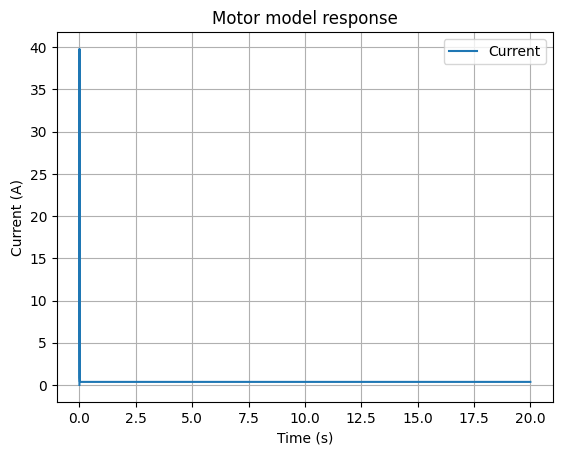

In [18]:
plt.figure()
plt.title('Motor model response')
plt.plot(t_sim2, x_sim2[:, 0], label='Current')  # Plot current
#plt.plot(t_sim2, x_sim2[:, 1], label='Theta')  # Plot angular position
#plt.plot(t_sim2, x_sim2[:, 2], label='Theta_dot')  # Plot angular velocity
plt.xlabel('Time (s)')
#plt.ylabel('Current/ Angle / Angular velocity')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(True)
plt.show()

En simulink, aplicando una entrada de 18v y retardo de 0.5s, el impulso se eleva alrededor de 40.6A.
Para la misma entrada en simulink pero sin retardo, el impulso se eleva a 39.8 A. Es decir, se observa que ante la existencia de retardo,  la respuesta del sistema tiene un sobre impulso ligeramente mayor. Al rededor del 2.01 %.
La respuesta del sitema obtenida en python se eleva a  39.80311697667082.
Valor max obtenido en Simulink=  39.80311697667.
En este punto el error en el sobreimpulso entre las respuesta de python y simulink es aprox. 2.06 e^-12 %. (Una muy buena aproximación).

En estado estacionario, simulink muestra un valor de corriente aproximado de 0.35 A. Mientras que en python, el valor de corriente en estado estacionario tambien se aproxima a 0.35A, con el mismo valor de certeza sobre  el porcentaje de error.

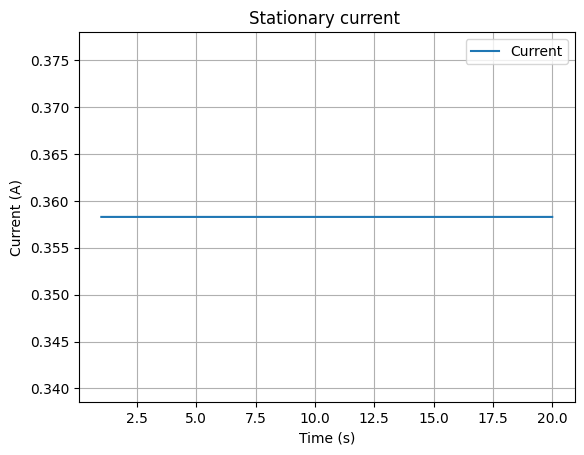

In [14]:
plt.figure()
plt.title('Stationary current ')
plt.plot(t_sim2[1000:-1], x_sim2[1000:-1, 0], label='Current')  # Plot current
#plt.plot(t_sim2, x_sim2[:, 1], label='Theta')  # Plot angular position
#plt.plot(t_sim2, x_sim2[:, 2], label='Theta_dot')  # Plot angular velocity
plt.xlabel('Time (s)')
#plt.ylabel('Current/ Angle / Angular velocity')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(True)
plt.show()